<a href="https://colab.research.google.com/github/lilusmith/Data151-Project/blob/main/DATA_151_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of Environmental Parameters of Soil

Import data and libraries, analyse the nature of the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from itertools import combinations
from joblib import Parallel, delayed
import multiprocessing

In [ ]:
soil_data = pd.read_csv("/content/SHLT_Soil_Data_Corrected.csv")

soil_data

,Data_Point_ID,Sample_Type_(A_Horizon_Sub-Surface),A_Horizon_Depth_(cm)_(repeat_value_for_sub-surface_data),DRYING_A_Horizon_Sub-surface_Dried,DRYING_Bulk_Density_Dried,BULK_DENSITY_Dry_Soil_(<2mm)_(g),BULK_DENSITY_Gravel_Mass_(g),BULK_DENSITY_Rock_Volume_(cm^3),BULK_DENSITY_Soil_Volume_(cm^3),BULK_DENSITY_Bulk_Density_(g/cm^3),...,LOSS-ON-IGNITION_Crucible_1000C_(g),LOSS-ON-IGNITION_Wet_Sample_(g),LOSS-ON-IGNITION_Dry_Sample_(g),LOSS-ON-IGNITION_Mineral_Sample_(g),LOSS-ON-IGNITION_Carbonate-Free_Mineral_Sample_(g),LOSS-ON-IGNITION_OM_Percentage,LOSS-ON-IGNITION_SOC_Percentage_(40_Percent_estimate),LOSS-ON-IGNITION_CaCO3_Percentage,LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_horizon_per_sq_m,LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_10_cm_per_sq_m
0,AA-21,A Horizon,NM,Yes,NaN,77.697,0.896,0.338113,90.139755,0.861962,...,31.285,11.698,11.561,10.990,10.913,4.94%,1.98%,1.59%,#VALUE!,1.702983
1,AA-21,Sub Surface,NM,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,30.786,10.331,10.201,9.935,9.773,2.61%,1.04%,3.71%,#VALUE!,0.000000
2,AB-8,A Horizon,19,Yes,Yes,115.005,13.625,5.141509,85.336359,1.347667,...,26.356,10.388,10.329,10.041,9.975,2.79%,1.12%,1.49%,2.855960063,1.503137
3,AB-8,Sub Surface,19,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,25.812,10.193,10.119,9.996,9.934,1.22%,0.49%,1.41%,0,0.000000
4,AC-13,A Horizon,NaN,Yes,Yes,121.377,5.322,2.008302,88.469567,1.371963,...,27.163,10.719,10.649,10.324,10.251,3.05%,1.22%,1.61%,0,1.674938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Y-25,Sub Surface,NM,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,34.893,11.356,11.255,10.978,10.870,2.46%,0.98%,2.24%,#VALUE!,0.000000
202,Y-27,A Horizon,NM,Yes,Yes,91.133,0.110,0.041509,90.436359,1.007703,...,26.509,10.470,10.337,9.653,9.586,6.62%,2.65%,1.58%,#VALUE!,2.667325
203,Y-27,Sub Surface,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.406,11.371,11.276,11.098,11.031,1.58%,0.63%,1.37%,#VALUE!,0.000000
204,Y-8,A Horizon,19,Yes,Yes,117.880,4.470,1.686792,88.791076,1.327611,...,28.837,10.613,10.525,10.226,10.181,2.84%,1.14%,1.00%,2.866521468,1.508696


In [ ]:
#Columns BEFORE cleaning

for i in soil_data.columns:
  print(i)

Data_Point_ID
Sample_Type_(A_Horizon_Sub-Surface)
A_Horizon_Depth_(cm)_(repeat_value_for_sub-surface_data)
DRYING_A_Horizon_Sub-surface_Dried
DRYING_Bulk_Density_Dried
BULK_DENSITY_Dry_Soil_(<2mm)_(g)
BULK_DENSITY_Gravel_Mass_(g)
BULK_DENSITY_Rock_Volume_(cm^3)
BULK_DENSITY_Soil_Volume_(cm^3)
BULK_DENSITY_Bulk_Density_(g/cm^3)
LOSS-ON-IGNITION_Crucible_ID
LOSS-ON-IGNITION_Crucible_Mass_(g)
LOSS-ON-IGNITION_Crucible_Wet_(g)
LOSS-ON-IGNITION_Crucible_105C_(g)
LOSS-ON-IGNITION_Crucible_550C_(g)
LOSS-ON-IGNITION_Crucible_1000C_(g)
LOSS-ON-IGNITION_Wet_Sample_(g)
LOSS-ON-IGNITION_Dry_Sample_(g)
LOSS-ON-IGNITION_Mineral_Sample_(g)
LOSS-ON-IGNITION_Carbonate-Free_Mineral_Sample_(g)
LOSS-ON-IGNITION_OM_Percentage
LOSS-ON-IGNITION_SOC_Percentage_(40_Percent_estimate)
LOSS-ON-IGNITION_CaCO3_Percentage
LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_horizon_per_sq_m
LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_10_cm_per_sq_m


In [ ]:
# Check if there is any missing values in the data set
missing_values = soil_data.isnull().sum()
print(missing_values)

# Bulk Density measurments are only related to the A Horizon within a soil profile.
# Therefore there will be msising values for the subsurface sample at each sample point.

Data_Point_ID                                                   0
Sample_Type_(A_Horizon_Sub-Surface)                             0
A_Horizon_Depth_(cm)_(repeat_value_for_sub-surface_data)      137
DRYING_A_Horizon_Sub-surface_Dried                             51
DRYING_Bulk_Density_Dried                                      97
BULK_DENSITY_Dry_Soil_(<2mm)_(g)                              103
BULK_DENSITY_Gravel_Mass_(g)                                  103
BULK_DENSITY_Rock_Volume_(cm^3)                               103
BULK_DENSITY_Soil_Volume_(cm^3)                               103
BULK_DENSITY_Bulk_Density_(g/cm^3)                            103
LOSS-ON-IGNITION_Crucible_ID                                    3
LOSS-ON-IGNITION_Crucible_Mass_(g)                              3
LOSS-ON-IGNITION_Crucible_Wet_(g)                               3
LOSS-ON-IGNITION_Crucible_105C_(g)                              3
LOSS-ON-IGNITION_Crucible_550C_(g)                              3
LOSS-ON-IG

In [ ]:
# All the 'percentage' columns are structured like ab%, we need to convert it to float and delete the % character

# List of columns to convert
percentage_columns = [
    'LOSS-ON-IGNITION_OM_Percentage',
    'LOSS-ON-IGNITION_SOC_Percentage_(40_Percent_estimate)',
    'LOSS-ON-IGNITION_CaCO3_Percentage'
]

# Remove the percentage sign and convert to float
for column in percentage_columns:
    soil_data[column] = soil_data[column].str.replace('%', '').astype(float)


In [ ]:
# Explore the data and its variable types
print(soil_data.dtypes)

Data_Point_ID                                                  object
Sample_Type_(A_Horizon_Sub-Surface)                            object
A_Horizon_Depth_(cm)_(repeat_value_for_sub-surface_data)       object
DRYING_A_Horizon_Sub-surface_Dried                             object
DRYING_Bulk_Density_Dried                                      object
BULK_DENSITY_Dry_Soil_(<2mm)_(g)                              float64
BULK_DENSITY_Gravel_Mass_(g)                                  float64
BULK_DENSITY_Rock_Volume_(cm^3)                               float64
BULK_DENSITY_Soil_Volume_(cm^3)                               float64
BULK_DENSITY_Bulk_Density_(g/cm^3)                            float64
LOSS-ON-IGNITION_Crucible_ID                                   object
LOSS-ON-IGNITION_Crucible_Mass_(g)                            float64
LOSS-ON-IGNITION_Crucible_Wet_(g)                             float64
LOSS-ON-IGNITION_Crucible_105C_(g)                            float64
LOSS-ON-IGNITION_Cru

# Delete columns

In [ ]:
# Remove redundant or unnecessary columns
# drop A_Horizon_Depth_(cm)_(repeat_value_for_sub-surface_data)

columns_to_drop = ["A_Horizon_Depth_(cm)_(repeat_value_for_sub-surface_data)",
                   "DRYING_A_Horizon_Sub-surface_Dried",
                   "LOSS-ON-IGNITION_Crucible_ID",
                   "DRYING_Bulk_Density_Dried"]

soil_data = soil_data.drop(columns=columns_to_drop)

# Delete rows

In [ ]:
# Remove rows where 'LOSS-ON-IGNITION_Crucible_ID' is missing
soil_data = soil_data.dropna(subset=['LOSS-ON-IGNITION_Crucible_Mass_(g)'])

# After cleaning checks

In [ ]:
missing_values = soil_data.isnull().sum()
print(missing_values)

Data_Point_ID                                                   0
Sample_Type_(A_Horizon_Sub-Surface)                             0
BULK_DENSITY_Dry_Soil_(<2mm)_(g)                              100
BULK_DENSITY_Gravel_Mass_(g)                                  100
BULK_DENSITY_Rock_Volume_(cm^3)                               100
BULK_DENSITY_Soil_Volume_(cm^3)                               100
BULK_DENSITY_Bulk_Density_(g/cm^3)                            100
LOSS-ON-IGNITION_Crucible_Mass_(g)                              0
LOSS-ON-IGNITION_Crucible_Wet_(g)                               0
LOSS-ON-IGNITION_Crucible_105C_(g)                              0
LOSS-ON-IGNITION_Crucible_550C_(g)                              0
LOSS-ON-IGNITION_Crucible_1000C_(g)                             0
LOSS-ON-IGNITION_Wet_Sample_(g)                                 0
LOSS-ON-IGNITION_Dry_Sample_(g)                                 0
LOSS-ON-IGNITION_Mineral_Sample_(g)                             0
LOSS-ON-IG

In [ ]:
for i in soil_data.columns:
  print(i)

Data_Point_ID
Sample_Type_(A_Horizon_Sub-Surface)
BULK_DENSITY_Dry_Soil_(<2mm)_(g)
BULK_DENSITY_Gravel_Mass_(g)
BULK_DENSITY_Rock_Volume_(cm^3)
BULK_DENSITY_Soil_Volume_(cm^3)
BULK_DENSITY_Bulk_Density_(g/cm^3)
LOSS-ON-IGNITION_Crucible_Mass_(g)
LOSS-ON-IGNITION_Crucible_Wet_(g)
LOSS-ON-IGNITION_Crucible_105C_(g)
LOSS-ON-IGNITION_Crucible_550C_(g)
LOSS-ON-IGNITION_Crucible_1000C_(g)
LOSS-ON-IGNITION_Wet_Sample_(g)
LOSS-ON-IGNITION_Dry_Sample_(g)
LOSS-ON-IGNITION_Mineral_Sample_(g)
LOSS-ON-IGNITION_Carbonate-Free_Mineral_Sample_(g)
LOSS-ON-IGNITION_OM_Percentage
LOSS-ON-IGNITION_SOC_Percentage_(40_Percent_estimate)
LOSS-ON-IGNITION_CaCO3_Percentage
LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_horizon_per_sq_m
LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_10_cm_per_sq_m


In [ ]:
print(soil_data.dtypes)

Data_Point_ID                                                  object
Sample_Type_(A_Horizon_Sub-Surface)                            object
BULK_DENSITY_Dry_Soil_(<2mm)_(g)                              float64
BULK_DENSITY_Gravel_Mass_(g)                                  float64
BULK_DENSITY_Rock_Volume_(cm^3)                               float64
BULK_DENSITY_Soil_Volume_(cm^3)                               float64
BULK_DENSITY_Bulk_Density_(g/cm^3)                            float64
LOSS-ON-IGNITION_Crucible_Mass_(g)                            float64
LOSS-ON-IGNITION_Crucible_Wet_(g)                             float64
LOSS-ON-IGNITION_Crucible_105C_(g)                            float64
LOSS-ON-IGNITION_Crucible_550C_(g)                            float64
LOSS-ON-IGNITION_Crucible_1000C_(g)                           float64
LOSS-ON-IGNITION_Wet_Sample_(g)                               float64
LOSS-ON-IGNITION_Dry_Sample_(g)                               float64
LOSS-ON-IGNITION_Min

In [ ]:
soil_data

,Data_Point_ID,Sample_Type_(A_Horizon_Sub-Surface),BULK_DENSITY_Dry_Soil_(<2mm)_(g),BULK_DENSITY_Gravel_Mass_(g),BULK_DENSITY_Rock_Volume_(cm^3),BULK_DENSITY_Soil_Volume_(cm^3),BULK_DENSITY_Bulk_Density_(g/cm^3),LOSS-ON-IGNITION_Crucible_Mass_(g),LOSS-ON-IGNITION_Crucible_Wet_(g),LOSS-ON-IGNITION_Crucible_105C_(g),...,LOSS-ON-IGNITION_Crucible_1000C_(g),LOSS-ON-IGNITION_Wet_Sample_(g),LOSS-ON-IGNITION_Dry_Sample_(g),LOSS-ON-IGNITION_Mineral_Sample_(g),LOSS-ON-IGNITION_Carbonate-Free_Mineral_Sample_(g),LOSS-ON-IGNITION_OM_Percentage,LOSS-ON-IGNITION_SOC_Percentage_(40_Percent_estimate),LOSS-ON-IGNITION_CaCO3_Percentage,LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_horizon_per_sq_m,LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_10_cm_per_sq_m
0,AA-21,A Horizon,77.697,0.896,0.338113,90.139755,0.861962,20.372,32.070,31.933,...,31.285,11.698,11.561,10.990,10.913,4.94,1.98,1.59,#VALUE!,1.702983
1,AA-21,Sub Surface,NaN,NaN,NaN,NaN,NaN,21.013,31.344,31.214,...,30.786,10.331,10.201,9.935,9.773,2.61,1.04,3.71,#VALUE!,0.000000
2,AB-8,A Horizon,115.005,13.625,5.141509,85.336359,1.347667,16.381,26.769,26.710,...,26.356,10.388,10.329,10.041,9.975,2.79,1.12,1.49,2.855960063,1.503137
3,AB-8,Sub Surface,NaN,NaN,NaN,NaN,NaN,15.878,26.071,25.997,...,25.812,10.193,10.119,9.996,9.934,1.22,0.49,1.41,0,0.000000
4,AC-13,A Horizon,121.377,5.322,2.008302,88.469567,1.371963,16.912,27.631,27.561,...,27.163,10.719,10.649,10.324,10.251,3.05,1.22,1.61,0,1.674938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Y-25,Sub Surface,NaN,NaN,NaN,NaN,NaN,24.023,35.379,35.278,...,34.893,11.356,11.255,10.978,10.870,2.46,0.98,2.24,#VALUE!,0.000000
202,Y-27,A Horizon,91.133,0.110,0.041509,90.436359,1.007703,16.923,27.393,27.260,...,26.509,10.470,10.337,9.653,9.586,6.62,2.65,1.58,#VALUE!,2.667325
203,Y-27,Sub Surface,NaN,NaN,NaN,NaN,NaN,20.375,31.746,31.651,...,31.406,11.371,11.276,11.098,11.031,1.58,0.63,1.37,#VALUE!,0.000000
204,Y-8,A Horizon,117.880,4.470,1.686792,88.791076,1.327611,18.656,29.269,29.181,...,28.837,10.613,10.525,10.226,10.181,2.84,1.14,1.00,2.866521468,1.508696


# Five number summary in numerical columns

In [ ]:
# Select only the float columns for summary statistics
float_columns = soil_data.select_dtypes(include=['float64'])

# Generate and display the summary statistics for float columns
summary = float_columns.describe()

print(summary)


       BULK_DENSITY_Dry_Soil_(<2mm)_(g)  BULK_DENSITY_Gravel_Mass_(g)  \
count                        103.000000                    103.000000   
mean                          74.357796                      1.295624   
std                           25.581069                      2.308179   
min                           26.295000                      0.000000   
25%                           52.609000                      0.000000   
50%                           76.052000                      0.244000   
75%                           94.799500                      1.610000   
max                          123.724000                     13.625000   

       BULK_DENSITY_Rock_Volume_(cm^3)  BULK_DENSITY_Soil_Volume_(cm^3)  \
count                       103.000000                       103.000000   
mean                          0.488915                        89.988954   
std                           0.871011                         0.871011   
min                           0.000000    

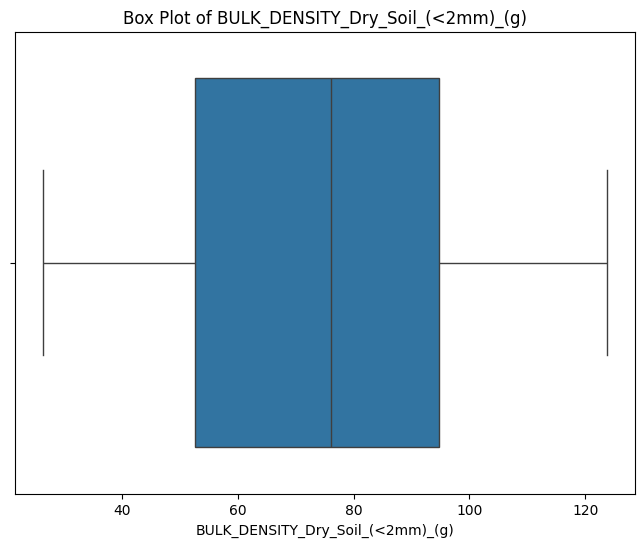

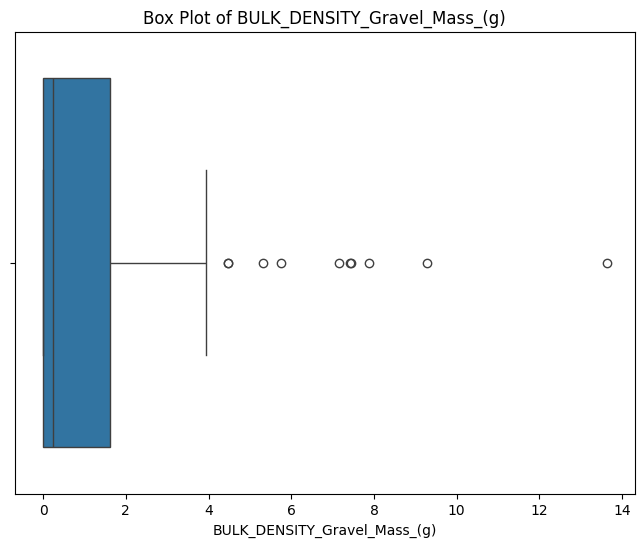

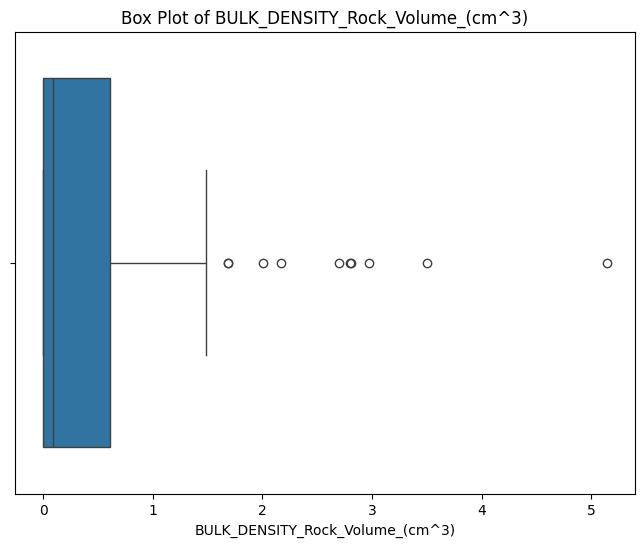

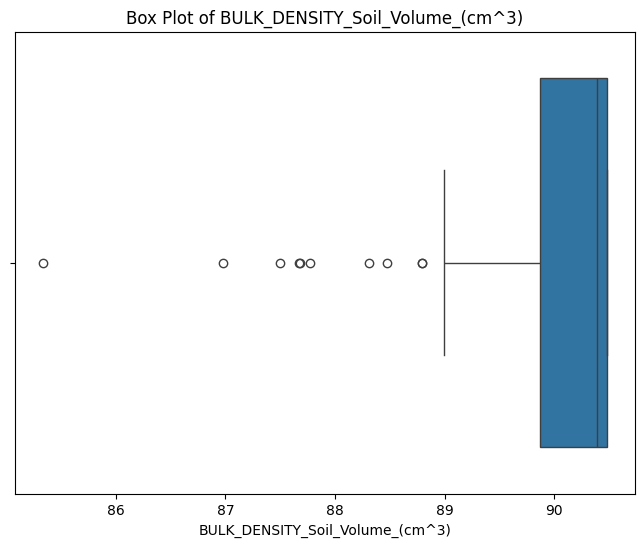

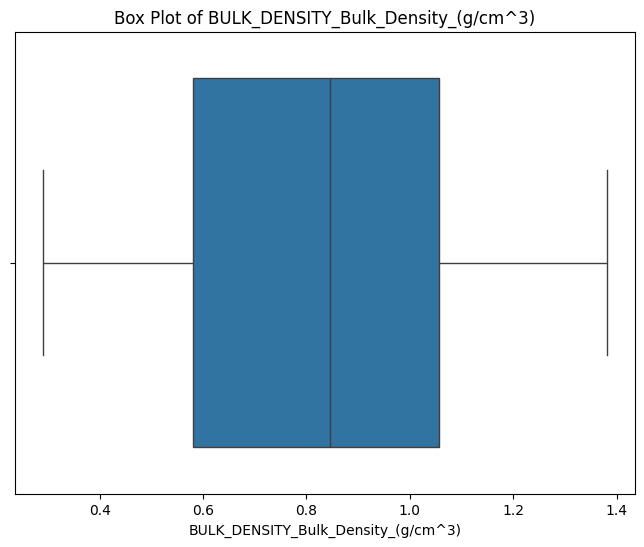

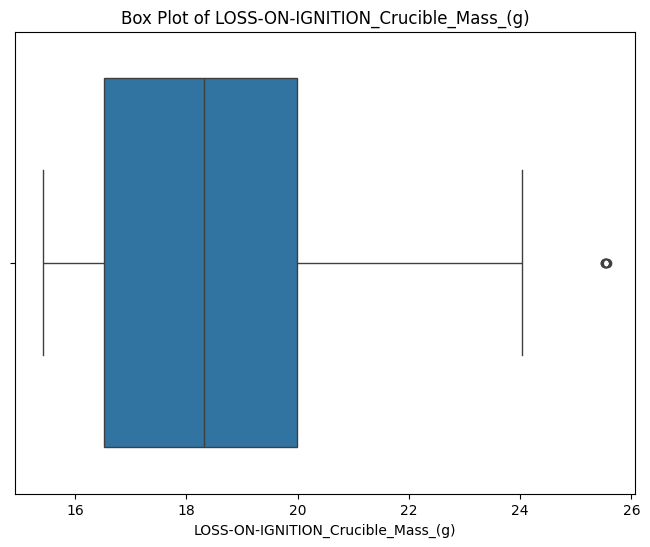

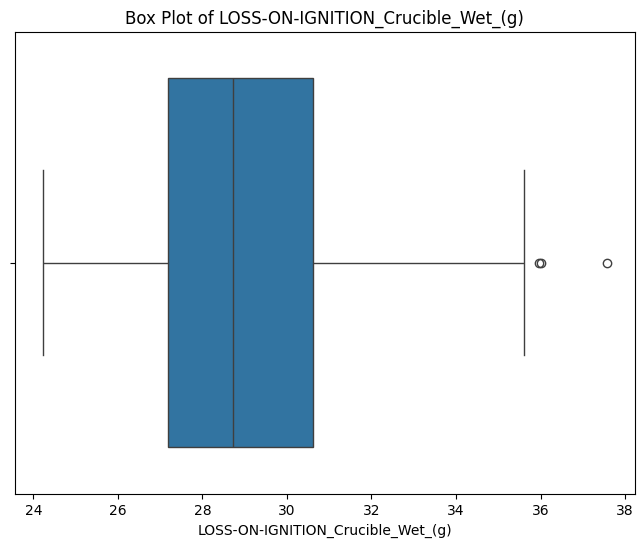

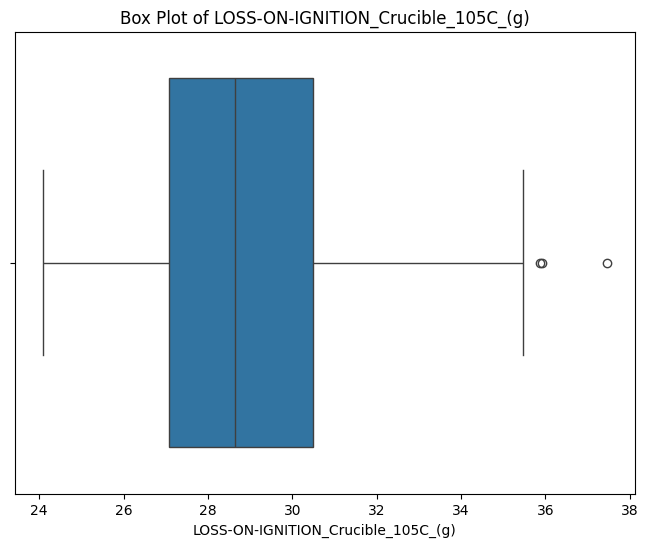

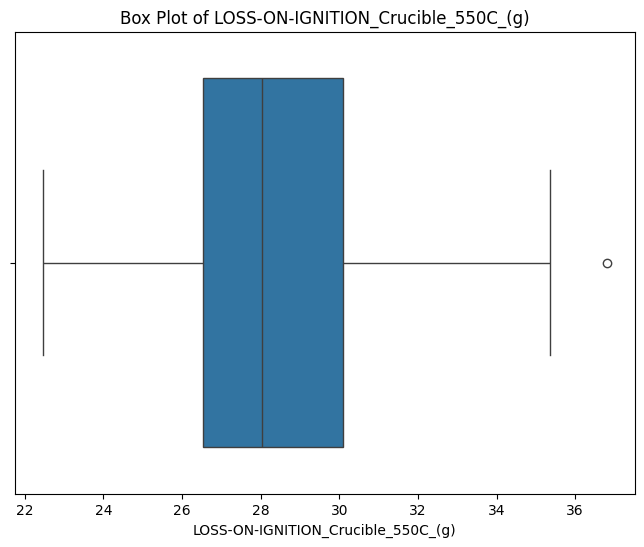

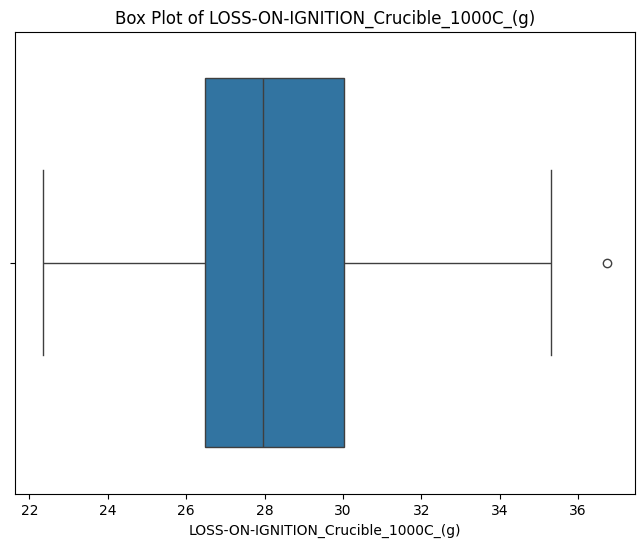

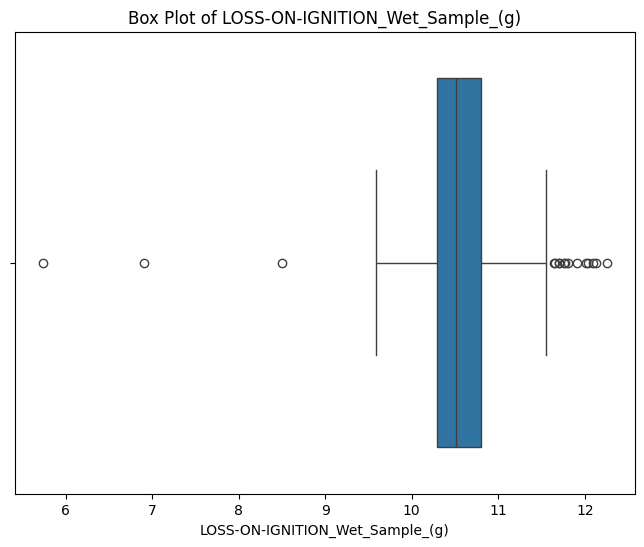

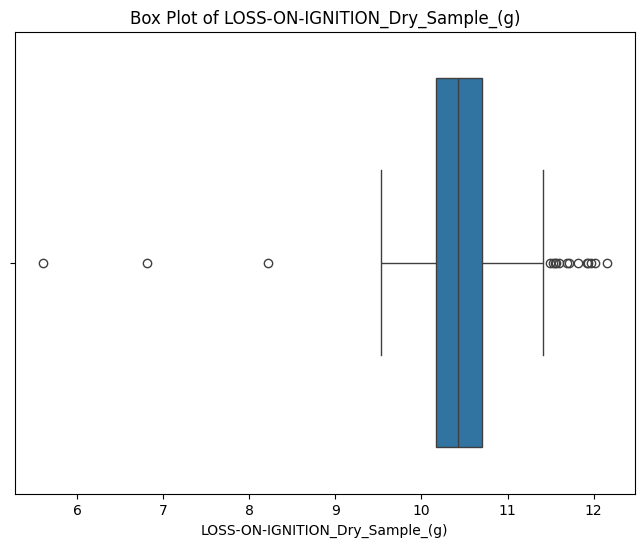

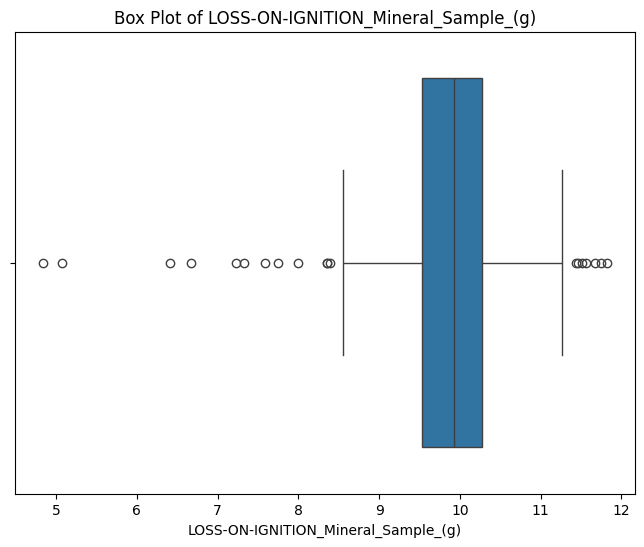

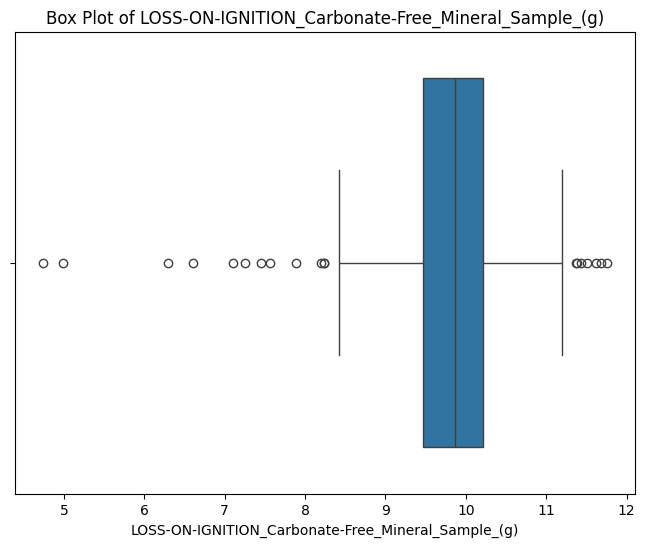

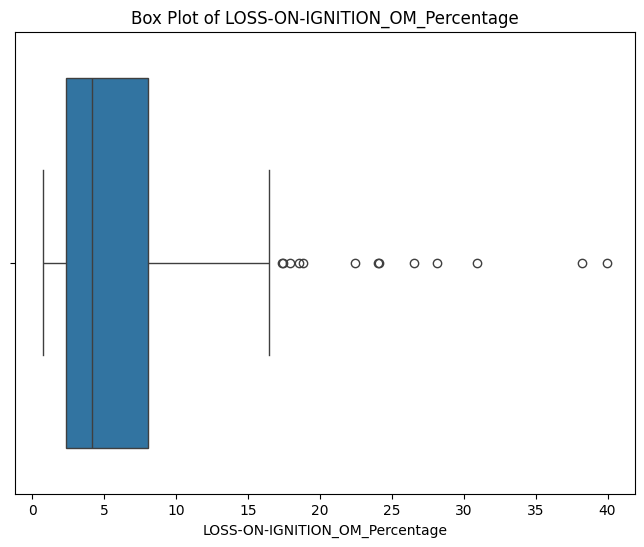

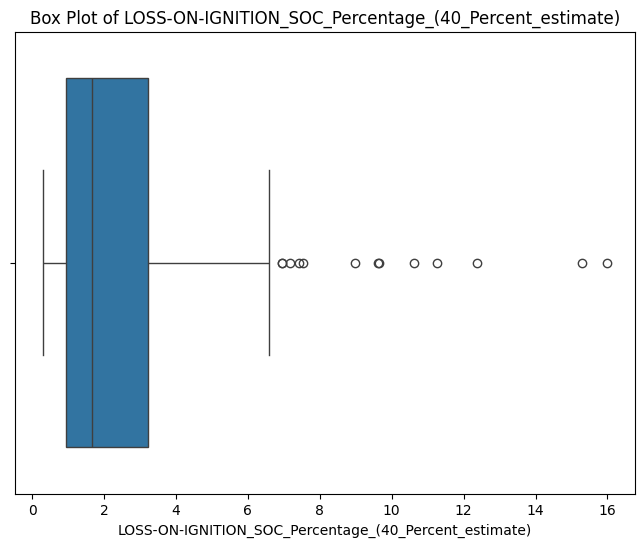

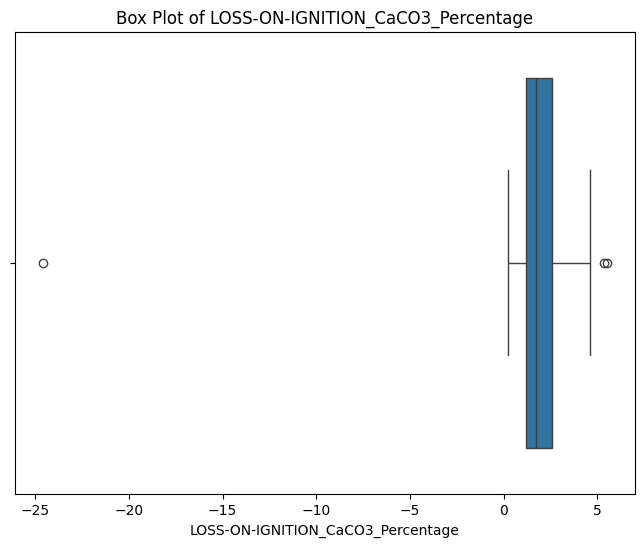

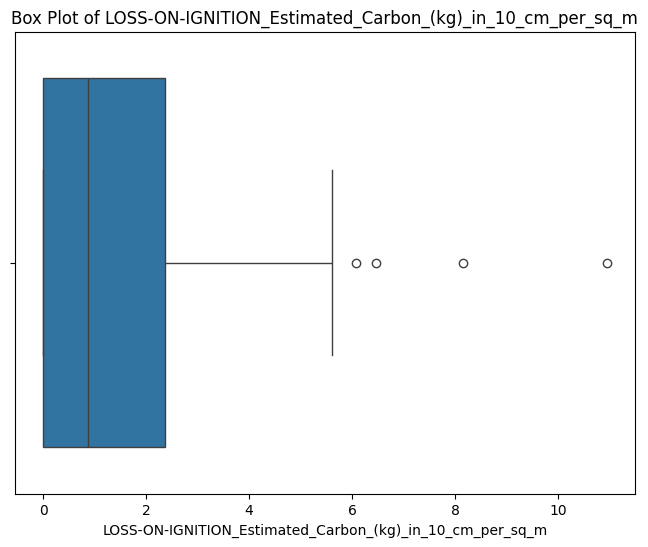

In [ ]:
# box plots for each numerical column
for column in soil_data.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=soil_data[column])
  plt.title(f'Box Plot of {column}')
  plt.show()

In [ ]:
#Pull the data out for only the A Horizon
A_Horizon = soil_data[soil_data['Sample_Type_(A_Horizon_Sub-Surface)'] == 'A Horizon']

#Pull the data out for only the Sub-Surface Horizons
Sub_Surface = soil_data[soil_data['Sample_Type_(A_Horizon_Sub-Surface)'].str.contains('Sub', na=False)]

# Display the number of rows in each dataset to confirm the separation
print("A_Horizon:", len(A_Horizon))
print("Sub_Surface:", len(Sub_Surface))

A_Horizon: 86
Sub_Surface: 98


In [ ]:
missing_values = Sub_Surface.isnull().sum()
print(missing_values)

Data_Point_ID                                                  0
Sample_Type_(A_Horizon_Sub-Surface)                            0
BULK_DENSITY_Dry_Soil_(<2mm)_(g)                              97
BULK_DENSITY_Gravel_Mass_(g)                                  97
BULK_DENSITY_Rock_Volume_(cm^3)                               97
BULK_DENSITY_Soil_Volume_(cm^3)                               97
BULK_DENSITY_Bulk_Density_(g/cm^3)                            97
LOSS-ON-IGNITION_Crucible_Mass_(g)                             0
LOSS-ON-IGNITION_Crucible_Wet_(g)                              0
LOSS-ON-IGNITION_Crucible_105C_(g)                             0
LOSS-ON-IGNITION_Crucible_550C_(g)                             0
LOSS-ON-IGNITION_Crucible_1000C_(g)                            0
LOSS-ON-IGNITION_Wet_Sample_(g)                                0
LOSS-ON-IGNITION_Dry_Sample_(g)                                0
LOSS-ON-IGNITION_Mineral_Sample_(g)                            0
LOSS-ON-IGNITION_Carbonat

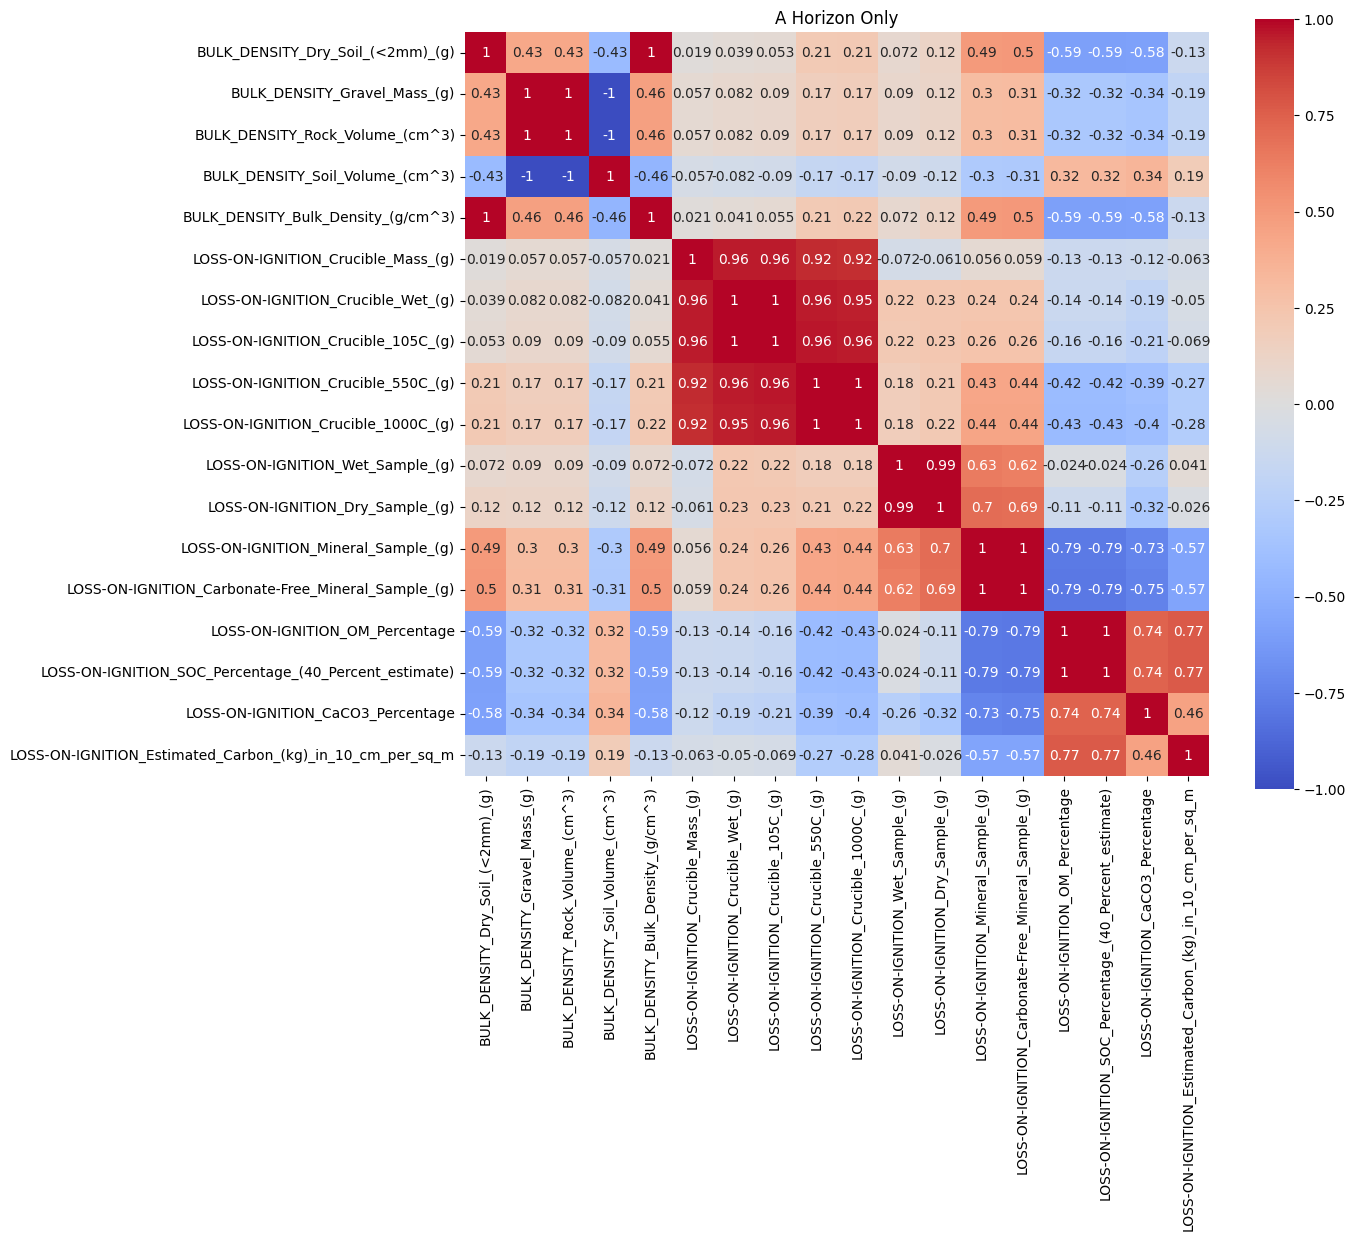

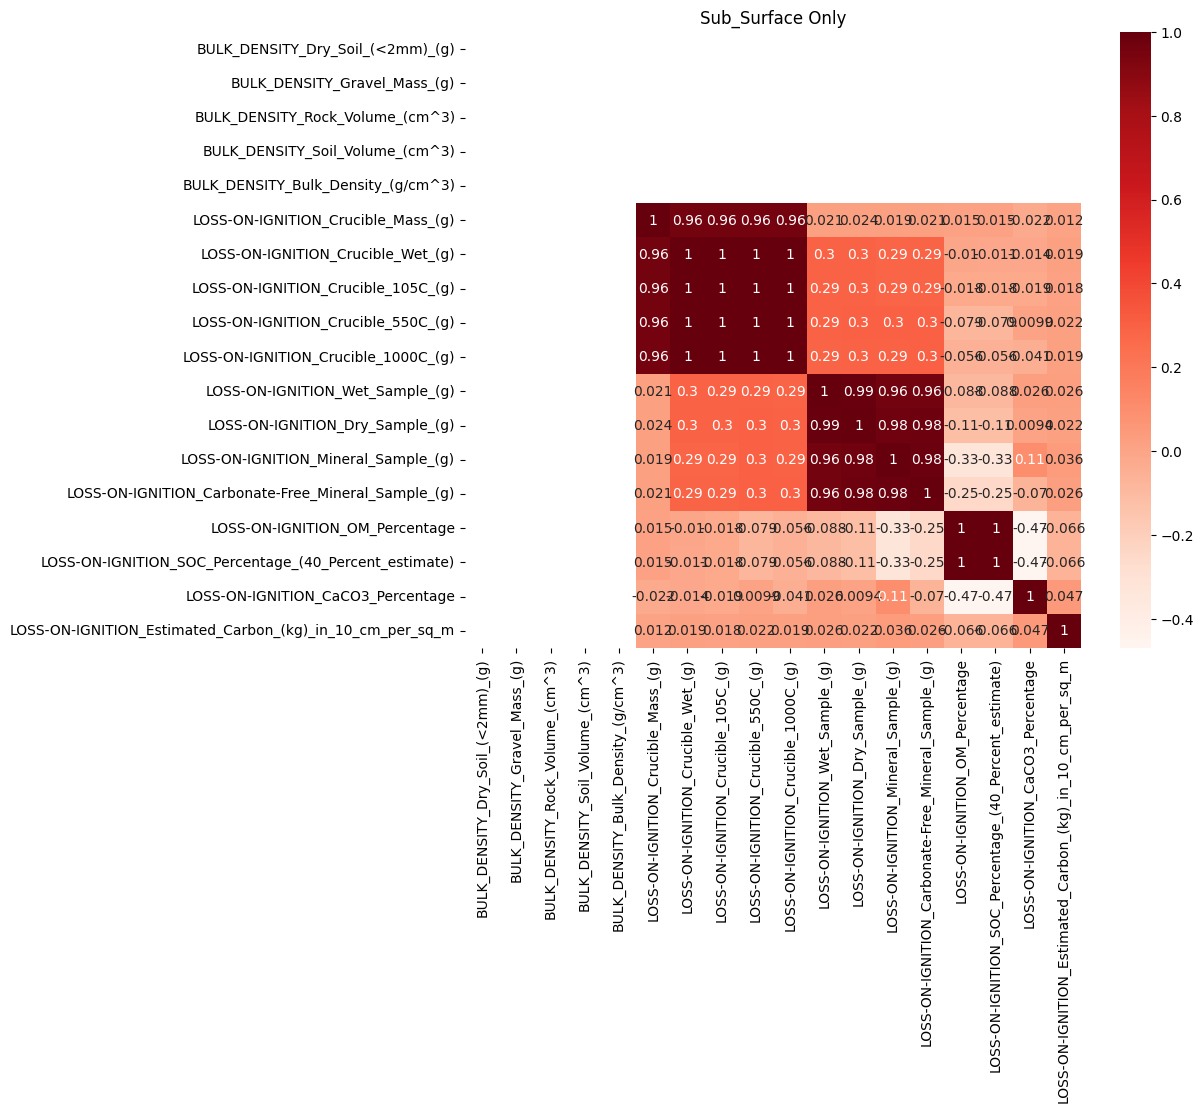

In [ ]:
# Create a full correlation matrix
A_Horizon_Corr_Matrix = A_Horizon.select_dtypes(include='number').corr()
Sub_Surface_Corr_Matrix = Sub_Surface.select_dtypes(include='number').corr()

# Plot the correlation matrix for data with only A Horizon (samples with BD measurements taken)
plt.figure(figsize=(12, 10))
sns.heatmap(A_Horizon_Corr_Matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title("A Horizon Only")
plt.show()

# Plot the correlation matrix for only the Sub-surface
plt.figure(figsize=(10, 8))
sns.heatmap(Sub_Surface_Corr_Matrix, annot=True, cmap='Reds', cbar=True, square=True)
plt.title("Sub_Surface Only")
plt.show()

# Modeling

First trial of linear regression

In [ ]:
# Define the target (y)
target = ['LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_10_cm_per_sq_m']


features = ['LOSS-ON-IGNITION_Carbonate-Free_Mineral_Sample_(g)', 'LOSS-ON-IGNITION_Wet_Sample_(g)', 'LOSS-ON-IGNITION_Mineral_Sample_(g)']

X = A_Horizon[features]
y = A_Horizon[target]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.2966367555289686
R-squared (R²): 0.7639890486507183


Linear regression model adding the percentages

In [ ]:
# Define the target (y)
target = ['LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_10_cm_per_sq_m']


features = ['LOSS-ON-IGNITION_Carbonate-Free_Mineral_Sample_(g)', 'LOSS-ON-IGNITION_Wet_Sample_(g)', 'LOSS-ON-IGNITION_Mineral_Sample_(g)',
            'LOSS-ON-IGNITION_OM_Percentage', 'LOSS-ON-IGNITION_SOC_Percentage_(40_Percent_estimate)', 'LOSS-ON-IGNITION_CaCO3_Percentage']

X = A_Horizon[features]
y = A_Horizon[target]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.264557394603432
R-squared (R²): 0.7895121180262984


Decision tree model

In [ ]:
# Coefficients of the features

print("Shape of model.coef_:", model.coef_.shape)

# Then flatten if needed
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_.flatten()})
print(coefficients)


AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

In [ ]:
# Tree model

model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.7453613471084294
R-squared (R²): 0.40697355485718467


In [ ]:
# Setting a max depth to prevent overfitting
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict again and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Tuned Mean Squared Error (MSE): {mse}")
print(f"Tuned R-squared (R²): {r2}")


Tuned Mean Squared Error (MSE): 1.104328747260871
Tuned R-squared (R²): 0.12137092458879051


Lasso regression model

In [ ]:
# Initialize the Lasso model with a specified alpha value
# adjust alpha to see how it affects model performance

model = Lasso(alpha=0.3, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.3562534059497161
R-squared (R²): 0.716556685264165


Alpha 0.1 :
* MSE = 0.36075214458317945
* R squared = 0.7129773864585868

Alpha 0.2 :
* MSE =  0.4655267112482904
* R squared = 0.6296163575404198

Alpha 0.3 :
* MSE =  0.6402422257070604
* R squared = 0.4906087193623295


# Iterate over Lasso regression model to find the best alpha

In [ ]:
#Finding the best alpha for Lasso modeling

alphagam = 0.01
best_mse = [0,1,0]
best_rsquared = [0,0,0]

for i in range(0,10000):

  model = Lasso(alpha = alphagam, random_state=42)

  # Fit the model on the training data
  model.fit(X_train, y_train)


  # Predict on the test set
  y_pred = model.predict(X_test)

  # Calculate performance metrics
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  if (mse < best_mse[1]):
    best_mse[0] = alphagam
    best_mse[1] = mse
    best_mse[2] = r2

  if (r2 > best_rsquared[2]):
    best_rsquared[0] = alphagam
    best_rsquared[1] = mse
    best_rsquared[2] = r2

  alphagam = alphagam + 0.01

print(f"Alpha from a range from 0.01 to 100")
print(f"Best Mean Squared Error (MSE): {best_mse}")
print(f"Best R-squared (R²): {best_rsquared}")

Alpha from a range from 0.01 to 100
Best Mean Squared Error (MSE): [0.01, 0.30104178861908576, 0.7604843041072792]
Best R-squared (R²): [0.01, 0.30104178861908576, 0.7604843041072792]


Best Alpha above all is 0.01

Best Mean Squared Error (MSE): [0.01, 0.30104178861908576, 0.7604843041072792]


Best R-squared (R²): [0.01, 0.30104178861908576, 0.7604843041072792]

# Iterate over Linear regression combinations to find the best one

In [ ]:
# Target variable
target = 'LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_10_cm_per_sq_m'

# List of all feature columns excluding the target
feature_columns = [
    'LOSS-ON-IGNITION_Crucible_Mass_(g)',
    'LOSS-ON-IGNITION_Crucible_Wet_(g)',
    'LOSS-ON-IGNITION_Crucible_105C_(g)',
    'LOSS-ON-IGNITION_Crucible_550C_(g)',
    'LOSS-ON-IGNITION_Crucible_1000C_(g)',
    'LOSS-ON-IGNITION_Wet_Sample_(g)',
    'LOSS-ON-IGNITION_Dry_Sample_(g)',
    'LOSS-ON-IGNITION_Mineral_Sample_(g)',
    'LOSS-ON-IGNITION_Carbonate-Free_Mineral_Sample_(g)',
    'LOSS-ON-IGNITION_OM_Percentage',
    'LOSS-ON-IGNITION_SOC_Percentage_(40_Percent_estimate)',
    'LOSS-ON-IGNITION_CaCO3_Percentage'
]

def evaluate_combination(comb):
    X = A_Horizon[list(comb)]
    y = A_Horizon[target]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {'Features': comb, 'MSE': mse, 'R2': r2}



# Get all combinations of 6 features
all_combinations = list(combinations(feature_columns, 6))

# Evaluate all combinations in parallel
num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores)(
    delayed(evaluate_combination)(comb) for comb in all_combinations
)


# Update Pandas display settings for full column width
pd.set_option('display.max_colwidth', None)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Find the best combinations
best_mse_combination = results_df.nsmallest(1, 'MSE').iloc[0]
best_r2_combination = results_df.nlargest(1, 'R2').iloc[0]

# Display the best combinations
print("Best Combination by Mean Squared Error (MSE):")
print(best_mse_combination)

print("\nBest Combination by R-squared (R²):")
print(best_r2_combination)

# Optionally, display the top 5 combinations with the lowest MSE
print("\nTop 5 Combinations with Lowest MSE:")
print(results_df.nsmallest(5, 'MSE'))

# Optionally, display the top 5 combinations with the highest R²
print("\nTop 5 Combinations with Highest R²:")
print(results_df.nlargest(5, 'R2'))


Best Combination by Mean Squared Error (MSE):
Features    (LOSS-ON-IGNITION_Dry_Sample_(g), LOSS-ON-IGNITION_Mineral_Sample_(g), LOSS-ON-IGNITION_Carbonate-Free_Mineral_Sample_(g), LOSS-ON-IGNITION_OM_Percentage, LOSS-ON-IGNITION_SOC_Percentage_(40_Percent_estimate), LOSS-ON-IGNITION_CaCO3_Percentage)
MSE                                                                                                                                                                                                                                                     0.201726
R2                                                                                                                                                                                                                                                      0.839502
Name: 923, dtype: object

Best Combination by R-squared (R²):
Features    (LOSS-ON-IGNITION_Dry_Sample_(g), LOSS-ON-IGNITION_Mineral_Sample_(g), LOSS-ON-IGNITION_Carbonate-Free_Minera

In [ ]:
print("Columns in A_Horizon:", A_Horizon.columns)


Columns in A_Horizon: Index(['Data_Point_ID', 'Sample_Type_(A_Horizon_Sub-Surface)',
       'BULK_DENSITY_Dry_Soil_(<2mm)_(g)', 'BULK_DENSITY_Gravel_Mass_(g)',
       'BULK_DENSITY_Rock_Volume_(cm^3)', 'BULK_DENSITY_Soil_Volume_(cm^3)',
       'BULK_DENSITY_Bulk_Density_(g/cm^3)',
       'LOSS-ON-IGNITION_Crucible_Mass_(g)',
       'LOSS-ON-IGNITION_Crucible_Wet_(g)',
       'LOSS-ON-IGNITION_Crucible_105C_(g)',
       'LOSS-ON-IGNITION_Crucible_550C_(g)',
       'LOSS-ON-IGNITION_Crucible_1000C_(g)',
       'LOSS-ON-IGNITION_Wet_Sample_(g)', 'LOSS-ON-IGNITION_Dry_Sample_(g)',
       'LOSS-ON-IGNITION_Mineral_Sample_(g)',
       'LOSS-ON-IGNITION_Carbonate-Free_Mineral_Sample_(g)',
       'LOSS-ON-IGNITION_OM_Percentage',
       'LOSS-ON-IGNITION_SOC_Percentage_(40_Percent_estimate)',
       'LOSS-ON-IGNITION_CaCO3_Percentage',
       'LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_horizon_per_sq_m',
       'LOSS-ON-IGNITION_Estimated_Carbon_(kg)_in_10_cm_per_sq_m'],
      dtype='object')


#Best model results:
1.   Linear regression:
  *   MSE 0.201726  
  *   R squared 0.839502  
1.   Lasso [alpha 0.01]:
  *   MSE 0.30104
  *   R squared 0.76048
1.   Decision tree:
  *   MSE 0.74536
  *   R squared 0.40697



